# Hướng dẫn toàn diện về Histogram trong Matplotlib

## 1. Giới thiệu về Histogram

**Histogram** (biểu đồ tần suất) là một biểu đồ thống kê dùng để hiển thị phân phối tần suất của một tập dữ liệu liên tục. Nó chia dữ liệu thành các khoảng (bins) và đếm số lượng quan sát trong mỗi khoảng.

###  Khi nào sử dụng Histogram
✅ **Nên dùng khi:**
- Dữ liệu liên tục (continuous data)
- Muốn hiểu phân phối của một biến
- Kiểm tra tính normal của dữ liệu
- Phát hiện outliers
- So sánh phân phối của nhiều nhóm
- Exploratory Data Analysis (EDA)

### Histogram khác Bar Chart như thế nào?
| Histogram | Bar Chart |
|-----------|-----------|
| Dữ liệu liên tục | Dữ liệu rời rạc/categorical |
| Các cột liền kề nhau | Các cột có khoảng cách |
| Trục X là số | Trục X là category |
| Hiển thị phân phối | So sánh giá trị |

## 2. Tại sao Histogram quan trọng?

### 2.1 Các tác dụng chính
- **Hiểu phân phối dữ liệu**: Normal, skewed, bimodal, uniform
- **Phát hiện outliers**: Giá trị bất thường ở đuôi phân phối
- **Kiểm tra giả định**: Nhiều thuật toán ML yêu cầu dữ liệu normal
- **So sánh datasets**: Overlay nhiều histogram
- **Xác định ngưỡng**: Threshold cho classification
- **Quality control**: Kiểm tra sản phẩm có đạt tiêu chuẩn

### 2.2 Các loại phân phối phổ biến
```
Normal (Gaussian)     Skewed Right         Skewed Left
      /\                  /\                    /\
     /  \                /  \                  /  \
    /    \              /    \---             /    \
   /      \            /       \---       ---/      \
  /        \          /          \---  ---/          \

Bimodal              Uniform               Exponential
   /\  /\              ----                 /\
  /  \/  \            |    |               /  \---
 /        \           |    |              /     \---
/          \          |    |             /        \---
             \        |    |            /           \---
```

## 3. Cú pháp cơ bản

```python
import matplotlib.pyplot as plt
import numpy as np

# Cú pháp đơn giản
plt.hist(data)

# Cú pháp đầy đủ
plt.hist(data, bins=10, range=None, density=False, weights=None,
         cumulative=False, bottom=None, histtype='bar', align='mid',
         orientation='vertical', rwidth=None, log=False, color=None,
         label=None, alpha=None, edgecolor=None, linewidth=None)
```

## 4. Các thuộc tính chính

### 4.1 Thuộc tính dữ liệu cơ bản
| Thuộc tính | Mô tả | Giá trị | Ví dụ |
|------------|-------|---------|-------|
| `data` | Dữ liệu đầu vào (bắt buộc) | Array-like | `[1,2,3,4,5]` |
| `bins` | Số lượng hoặc vị trí bins | Int hoặc array | `bins=20`, `bins=[0,5,10,15]` |
| `range` | Phạm vi dữ liệu | Tuple | `range=(0, 100)` |

### 4.2 Thuộc tính hiển thị
| Thuộc tính | Mô tả | Giá trị | Ví dụ |
|------------|-------|---------|-------|
| `density` | Normalize thành density | Boolean | `density=True` |
| `cumulative` | Histogram tích lũy | Boolean | `cumulative=True` |
| `histtype` | Kiểu histogram | String | `'bar'`, `'step'`, `'stepfilled'` |
| `orientation` | Hướng hiển thị | String | `'vertical'`, `'horizontal'` |

### 4.3 Thuộc tính thẩm mỹ
| Thuộc tính | Mô tả | Giá trị | Ví dụ |
|------------|-------|---------|-------|
| `color` | Màu sắc | Color | `'blue'`, `'#FF0000'` |
| `alpha` | Độ trong suốt | 0.0-1.0 | `alpha=0.7` |
| `edgecolor` | Màu viền | Color | `'black'`, `'white'` |
| `linewidth` | Độ dày viền | Float | `linewidth=1.5` |
| `rwidth` | Độ rộng tương đối của bars | 0.0-1.0 | `rwidth=0.8` |

## 5. Các loại Histogram

### 5.1 Basic Histogram
```python
# Histogram cơ bản
plt.hist(data, bins=30, alpha=0.7, color='blue')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.title('Phân phối dữ liệu')
```

### 5.2 Density Histogram 
```python
# Histogram density (diện tích = 1)
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.ylabel('Density')
```

### 5.3 Cumulative Histogram
```python
# Histogram tích lũy
plt.hist(data, bins=30, cumulative=True, alpha=0.7)
plt.ylabel('Cumulative Frequency')
```

### 5.4 Stepped Histogram
```python
# Histogram dạng step
plt.hist(data, bins=30, histtype='step', linewidth=2)
plt.hist(data, bins=30, histtype='stepfilled', alpha=0.5)
```

### 5.5 Horizontal Histogram
```python
# Histogram ngang
plt.hist(data, bins=30, orientation='horizontal', alpha=0.7)
plt.xlabel('Tần suất')
plt.ylabel('Giá trị')
```

## 6. Lựa chọn số lượng Bins

### 6.1 Các quy tắc phổ biến
```python
import numpy as np

n = len(data)  # Số lượng data points

# Sturges' Rule
bins_sturges = int(np.ceil(np.log2(n) + 1))

# Square Root Rule  
bins_sqrt = int(np.ceil(np.sqrt(n)))

# Rice Rule
bins_rice = int(np.ceil(2 * n**(1/3)))

# Freedman-Diaconis Rule
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
bin_width = 2 * iqr / (n**(1/3))
bins_fd = int(np.ceil((data.max() - data.min()) / bin_width))
```

### 6.2 Hướng dẫn thực tế
| Số lượng dữ liệu | Bins đề xuất | Lý do |
|------------------|--------------|-------|
| < 50 | 5-10 | Tránh noise |
| 50-200 | 10-20 | Cân bằng detail vs noise |
| 200-1000 | 20-50 | Hiển thị pattern tốt |
| > 1000 | 50-100 | Chi tiết cao |

## 7. Ứng dụng thực tế

### 7.1 Phân tích dữ liệu khách hàng
```python
# Tuổi khách hàng
ages = [25, 30, 35, 28, 45, 50, 33, 29, 41, 38, ...]
plt.hist(ages, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng khách hàng')
plt.title('Phân phối tuổi khách hàng')
plt.grid(True, alpha=0.3)
```

**Insight có thể rút ra:**
- Độ tuổi phổ biến nhất
- Có bao nhiều segment tuổi
- Chiến lược marketing phù hợp

### 7.2 Phân tích điểm thi
```python
# Điểm thi của học sinh
scores = [85, 90, 78, 92, 88, 76, 95, 82, 91, 87, ...]
plt.hist(scores, bins=15, alpha=0.7, color='lightgreen', edgecolor='darkgreen')
plt.xlabel('Điểm số')
plt.ylabel('Số học sinh')
plt.title('Phân phối điểm thi')
plt.axvline(np.mean(scores), color='red', linestyle='--', label=f'Mean: {np.mean(scores):.1f}')
plt.legend()
```

**Insight có thể rút ra:**
- Phân phối có normal không?
- Có học sinh nào cần hỗ trợ thêm?
- Chất lượng đề thi

### 7.3 Phân tích tài chính
```python
# Lợi nhuận hàng ngày
daily_returns = [0.02, -0.01, 0.03, 0.01, -0.02, ...]
plt.hist(daily_returns, bins=30, alpha=0.7, color='gold', edgecolor='orange')
plt.xlabel('Lợi nhuận (%)')
plt.ylabel('Số ngày')
plt.title('Phân phối lợi nhuận hàng ngày')
plt.axvline(0, color='red', linestyle='-', linewidth=2, label='Break-even')
plt.legend()
```

### 7.4 Kiểm soát chất lượng sản xuất
```python
# Trọng lượng sản phẩm (tiêu chuẩn: 100g ±5g)
weights = [98, 102, 99, 101, 103, 97, 100, 99, 102, ...]
plt.hist(weights, bins=25, alpha=0.7, color='lightcoral', edgecolor='darkred')
plt.axvline(95, color='red', linestyle='--', label='Min threshold')
plt.axvline(105, color='red', linestyle='--', label='Max threshold')
plt.axvline(100, color='green', linestyle='-', linewidth=2, label='Target')
plt.xlabel('Trọng lượng (g)')
plt.ylabel('Số sản phẩm')
plt.title('Kiểm soát chất lượng - Trọng lượng sản phẩm')
plt.legend()
```

## 8. So sánh nhiều Dataset

### 8.1 Overlay Histograms
```python
# So sánh điểm nam và nữ
plt.hist(male_scores, bins=20, alpha=0.5, label='Nam', color='blue')
plt.hist(female_scores, bins=20, alpha=0.5, label='Nữ', color='pink')
plt.xlabel('Điểm số')
plt.ylabel('Tần suất')
plt.title('So sánh điểm thi theo giới tính')
plt.legend()
```

### 8.2 Subplots
```python
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Subplot 1: Nam
axes[0].hist(male_scores, bins=20, alpha=0.7, color='blue')
axes[0].set_title('Điểm thi - Nam')
axes[0].set_ylabel('Tần suất')

# Subplot 2: Nữ  
axes[1].hist(female_scores, bins=20, alpha=0.7, color='pink')
axes[1].set_title('Điểm thi - Nữ')
axes[1].set_xlabel('Điểm số')
axes[1].set_ylabel('Tần suất')

plt.tight_layout()
```

### 8.3 Normalized Comparison
```python
# So sánh khi sample size khác nhau
plt.hist(data1, bins=20, alpha=0.5, density=True, label='Dataset 1')
plt.hist(data2, bins=20, alpha=0.5, density=True, label='Dataset 2')
plt.ylabel('Density')
plt.legend()
```

## 9. Phân tích phân phối

### 9.1 Các chỉ số thống kê
```python
import scipy.stats as stats

# Tính các chỉ số
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)[0][0]
std = np.std(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

# Vẽ histogram với các chỉ số
plt.hist(data, bins=30, alpha=0.7, density=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle='--', label=f'Mode: {mode:.2f}')
plt.legend()
plt.title(f'Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
```

### 9.2 Kiểm tra tính normal
```python
# Overlay với normal distribution
plt.hist(data, bins=30, density=True, alpha=0.7, label='Data')

# Fit normal distribution
mu, sigma = stats.norm.fit(data)
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal fit')
plt.legend()
plt.title('Kiểm tra phân phối Normal')

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)
print(f'Shapiro-Wilk test: p-value = {p_value:.4f}')
if p_value > 0.05:
    print('Dữ liệu có phân phối Normal')
else:
    print('Dữ liệu KHÔNG có phân phối Normal')
```

## 10. Các loại phân phối đặc biệt

### 10.1 Phân phối Normal
**Đặc điểm:**
- Đối xứng quanh mean
- Mean = Median = Mode
- 68% dữ liệu trong ±1σ, 95% trong ±2σ

**Ví dụ:** Chiều cao, cân nặng, điểm IQ

### 10.2 Phân phối Skewed
**Right-skewed (Positive skew):**
- Đuôi dài bên phải
- Mean > Median > Mode
- Ví dụ: Thu nhập, giá nhà

**Left-skewed (Negative skew):**
- Đuôi dài bên trái  
- Mode > Median > Mean
- Ví dụ: Tuổi tại thời điểm nghỉ hưu

### 10.3 Phân phối Bimodal
**Đặc điểm:**
- Có 2 đỉnh
- Thường từ 2 nhóm khác nhau
- Ví dụ: Chiều cao nam + nữ

### 10.4 Phân phối Uniform
**Đặc điểm:**
- Tất cả giá trị có xác suất bằng nhau
- Hình chữ nhật
- Ví dụ: Số random, ngày sinh

## 11. Best Practices

### 11.1 Lựa chọn bins
```python
# Thử nhiều số bins
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
bins_options = [10, 20, 50, 100]

for i, bins in enumerate(bins_options):
    ax = axes[i//2, i%2]
    ax.hist(data, bins=bins, alpha=0.7)
    ax.set_title(f'Bins = {bins}')
    
plt.tight_layout()
```

### 11.2 Thêm thông tin thống kê
```python
plt.hist(data, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='--', 
           label=f'Mean: {np.mean(data):.2f}')
plt.axvline(np.median(data), color='green', linestyle='--',
           label=f'Median: {np.median(data):.2f}')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất') 
plt.title('Phân phối với thống kê')
plt.legend()
plt.grid(True, alpha=0.3)
```

### 11.3 Xử lý outliers
```python
# Loại bỏ outliers trước khi vẽ
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
outliers = data[(data < lower_bound) | (data > upper_bound)]

plt.hist(filtered_data, bins=30, alpha=0.7, label='Normal data')
plt.hist(outliers, bins=10, alpha=0.7, color='red', label='Outliers')
plt.legend()
```

## 12. Các lỗi thường gặp

### 12.1 Quá nhiều hoặc quá ít bins
**Vấn đề:**
- Quá ít bins: Mất thông tin, không thấy pattern
- Quá nhiều bins: Noisy, khó interpret

**Giải pháp:**
- Thử nhiều giá trị bins
- Sử dụng công thức Sturges hoặc Freedman-Diaconis

### 12.2 Không normalize khi so sánh
**Vấn đề:** So sánh datasets có kích thước khác nhau
**Giải pháp:** Sử dụng `density=True`

### 12.3 Bỏ qua outliers
**Vấn đề:** Outliers làm méo histogram
**Giải pháp:** 
- Xử lý outliers trước
- Hoặc plot riêng outliers

### 12.4 Không thêm labels và title
**Vấn đề:** Khó hiểu biểu đồ
**Giải pháp:** Luôn thêm xlabel, ylabel, title

## 15. Tóm tắt



❌ **Không nên dùng khi:**
- Dữ liệu categorical (dùng bar chart)
- Dữ liệu time series (dùng line plot)
- Muốn thấy mối quan hệ giữa 2 biến (dùng scatter plot)
- Dữ liệu quá ít (<20 điểm)

### 15.2 Checklist cho Histogram tốt
- [ ] Chọn số bins phù hợp
- [ ] Thêm xlabel, ylabel, title có ý nghĩa
- [ ] Xử lý outliers nếu cần
- [ ] Thêm thống kê quan trọng (mean, median)
- [ ] Sử dụng colors và alpha hợp lý
- [ ] Thêm grid nhẹ để dễ đọc
- [ ] Normalize nếu so sánh nhiều datasets

### 15.3 Các insight thường gặp
1. **Normal distribution**: Dữ liệu tốt cho nhiều thuật toán ML
2. **Skewed distribution**: Cần transformation (log, sqrt)
3. **Bimodal**: Có thể có 2 nhóm khác nhau trong data
4. **Uniform**: Dữ liệu random hoặc được sample đều
5. **Outliers**: Cần investigate và quyết định xử lý

Histogram là công cụ fundamental trong Data Science, giúp hiểu sâu về dữ liệu trước khi áp dụng các thuật toán phức tạp hơn.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

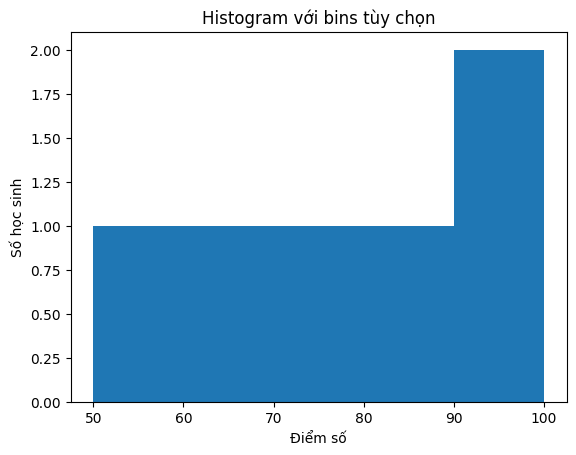

In [3]:
custom_bins = [50, 60, 70, 80, 90, 100]

plt.hist(custom_bins, bins=custom_bins)
plt.title("Histogram với bins tùy chọn")
plt.xlabel("Điểm số")
plt.ylabel("so hoc sinh")
plt.show()